##  1 (a) Create and plot a scatter graph for a dataset 

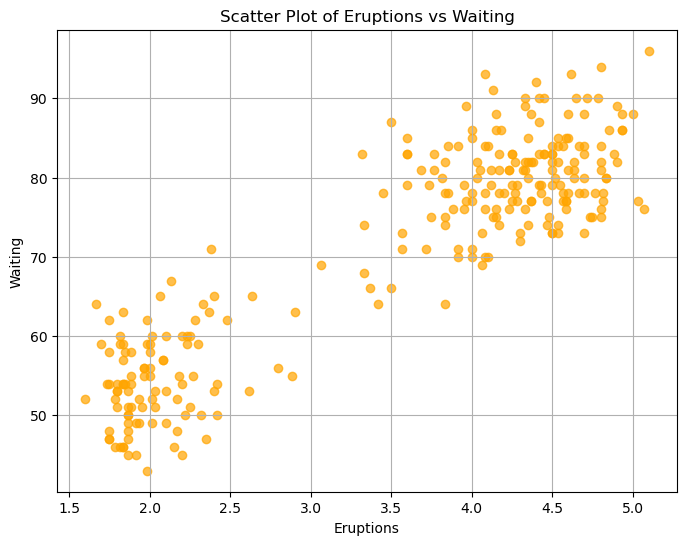

In [103]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("./faithful.csv")

# Create a DataFrame
df = pd.DataFrame(data)

# Plot the scatter graph
plt.figure(figsize=(8, 6))
plt.scatter(df['eruptions'], df['waiting'], color='orange', alpha=0.7)
plt.title('Scatter Plot of Eruptions vs Waiting')
plt.xlabel('Eruptions')
plt.ylabel('Waiting')
plt.grid(True)
plt.show()


#### 1(b) How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a “blob” of many data points that are close together, with regions of fewer data points between it and other “blobs”/clusters.
Ans : From the scatter plot, I see two clusters:
All the data points of the first cluster are located at eruption times around 2 minutes and waiting times around 50–60 minutes.
All the data points of the second cluster are located at eruption times around 4–5 minutes and waiting times around 80–90 minutes.

### 1(c)	Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset?
#### Steps of a hierarchical clustering algorithm
#### 1.	Initializing Clusters:
A)For agglomerative clustering: consider each data point as its cluster
       B)For divisive clustering: Start with all data points combined into a single large cluster
### 2.	Calculate Distances:
Measure the distance between clusters using methods such as Euclidean or Manhattan distance.
### 3.	Merge or Split Clusters:
A)For agglomerative clustering: Merge the two closest clusters and continue until the desired number of clusters is reached.
     B)For divisive clustering: Split the largest cluster and continue until each data point forms its cluster.
### 4.Stopping Criteria:
Stop when the desired number of clusters is achieved, or when further merging or splitting is no longer needed.
### Hierarchical clustering is appropriate for this dataset because:
The scatter plot clearly shows two distinct clusters, which hierarchical clustering can identify.
The dendrogram created by hierarchical clustering would give a clear visual representation of how the clusters are formed and how data points are grouped together.


### Question 2

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
# Replace 'your_dataset.csv' with the path to your file
data = pd.read_csv('./faithful.csv')

# Extract the two numerical attributes (adjust column names as per your CSV)
X = data[['eruptions', 'waiting']].to_numpy()  

### 2(a)Your source code for the k-means algorithm. You need to implement the algorithm from scratch. 

In [111]:
# K-means algorithm implementation
def k_means_clustering(data, k, max_iterations=100):
    # Step 1: Randomly initialize centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for iteration in range(max_iterations):
        # Step 2: Assign each point to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)  # Calculate distances
        clusters = np.argmin(distances, axis=1)  # Assign clusters
        
        # Step 3: Update centroids as the mean of assigned points
        new_centroids = np.array([data[clusters == cluster_id].mean(axis=0) for cluster_id in range(k)])
        
        # Check for convergence (if centroids do not change)
        if np.allclose(centroids, new_centroids, atol=1e-6):
            break
        
        centroids = new_centroids  # Update centroids for the next iteration

    return clusters, centroids


### 2(b)A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot. 

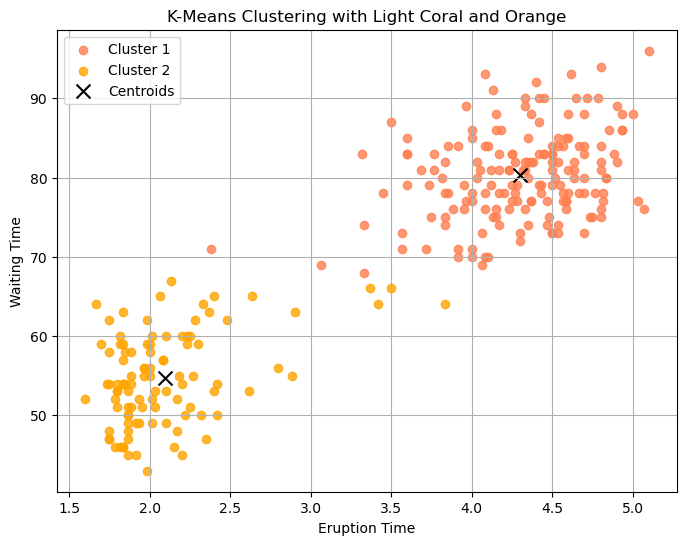

In [114]:
# Apply K-means clustering with requested colors
k = 2  # Number of clusters
max_iterations = 100
clusters, centroids = k_means_clustering(X, k, max_iterations)

# Define colors based on the request
colors = ['coral', 'orange']  # Cluster 1: Light Coral, Cluster 2: Orange

# Plot the results with the requested color scheme
plt.figure(figsize=(8, 6))
for cluster_id in range(k):
    plt.scatter(X[clusters == cluster_id, 0], X[clusters == cluster_id, 1], 
                color=colors[cluster_id], label=f'Cluster {cluster_id+1}', alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering with Light Coral and Orange')
plt.xlabel('Eruption Time')
plt.ylabel('Waiting Time')
plt.legend()
plt.grid(True)
plt.show()


### 2(c)A plot of the k-means objective function versus iterations of the algorithm

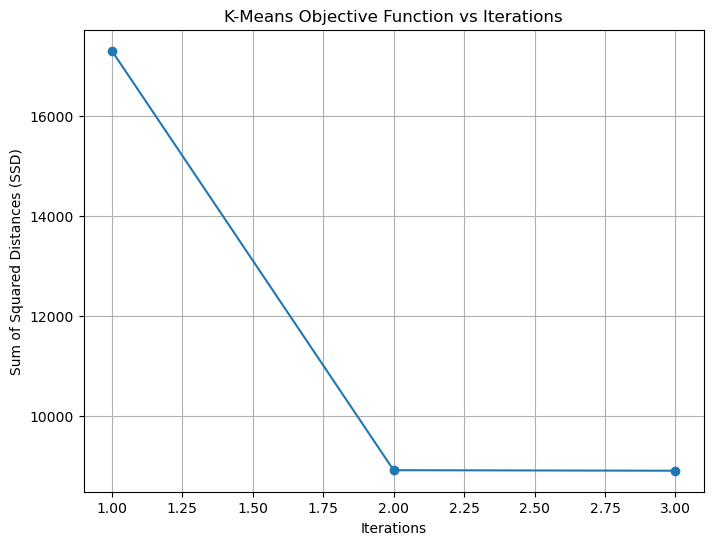

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
# Replace 'your_dataset.csv' with the actual path to your CSV file
data = pd.read_csv('./faithful.csv')


# Extract two numerical columns for clustering (replace 'attribute1' and 'attribute2' with actual column names)
X = data[['eruptions', 'waiting']].to_numpy()    # Ensure these are numerical columns in your CSV

# Modified K-Means Algorithm
def k_means_clustering(data, k, max_iterations=100):
    # Step 1: Randomly initialize centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    ssd_list = []  # To store the sum of squared distances for each iteration

    for iteration in range(max_iterations):
        # Step 2: Assign each point to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)  # Calculate distances
        clusters = np.argmin(distances, axis=1)  # Assign clusters

        # Step 3: Compute the SSD (objective function)
        ssd = np.sum((data - centroids[clusters])**2)
        ssd_list.append(ssd)

        # Step 4: Update centroids
        new_centroids = np.array([data[clusters == cluster_id].mean(axis=0) for cluster_id in range(k)])

        # Check for convergence
        if np.allclose(centroids, new_centroids, atol=1e-6):
            break

        centroids = new_centroids  # Update centroids for the next iteration

    return clusters, centroids, ssd_list

# Parameters
k = 2 # Number of clusters
max_iterations = 100

# Run K-Means
clusters, centroids, ssd_list = k_means_clustering(X, k, max_iterations)

# Plotting the K-Means Objective Function
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(ssd_list) + 1), ssd_list, marker='o')
plt.title('K-Means Objective Function vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.grid(True)
plt.show()


### 2(d)Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization?
Ans:Yes,K-means accurately identified the two clusters from Problem 1. Even though the centroids are initialized randomly, the clusters in this dataset are well-separated, so the results stayed consistent across different runs